<img style="float: right; margin: 0px 0px 15px 15px;" 
src="https://e.an.amtv.pe/util-e-interesante-como-limpiar-tanque-agua-n373128-610x343-581917.jpg" width="200px" height="50px" />

# Cantidad de sal en tanques de salmuera

Solución de sistema de ecuaciones diferenciales para averiguar la cantidad de sal en dos tanques que comparten flujo de agua

### Objetivo General

>Utilizar funciones de programación para resolver de manera aproximada un sistema de ecuaciones diferenciales que rige la cantidad de sal en dos tanques e interpretar el resultado obtenido.


### Objetivos específicos

* Lograr explicar de forma detallada como se genera el sistema de ecuaciones
* Utilizar las librerías para obtener una solución numérica con odeint.
* Graficar las soluciones $x_2$ y $x_1$ vs $t$, interpretar y dar un sentido físico.
* Graficar el retrato de fase ($x_2$ vs $x_1$) y comparar con la gráfica anterior


### Modelo que representa el problema

<img style="float: right; margin: 0px 0px 15px 15px;" 
src="http://www.unl.edu.ar/ingreso/cursos/matematica/wp-content/uploads/sites/7/2016/10/Recip04.png" width="200px" height="110px" />

Un tanque $A$ contiene $100 L$ de salmuera en la que están disueltos $100 kg$ de sal, y el
tanque $B$ contiene $100 L$ de agua. Supongamos que el agua fluye hacia el interior de
$A$ a razón de $2L/min$, y que la mezcla fluye del tanque $A$ hacia el $B$ a razón de $3L/min$.
Un litro por minuto se bombea del tanque $B$ hacia el $A$ y 2 litros por minuto fluyen del
tanque $B$ hacia el exterior. Determinar la cantidad de sal en cada tanque en cualquier
momento.

>Sean $x(t)$ y $y(t)$, repectivamente, las cantidades de sal en $kg$. contenidas en los tanques
$A$ y $B$. Puesto que el líquido fluye hacia el tanque $A$ a razón de $3L/min$ y fluye hacia el
exterior a la misma velocidad, el volumen de líquido contenido en el tanque $A$ permanece
constante. Análogamente, el volumen del líquido del tanque $B$ permanece constante.
Teniendo en cuenta los datos del enunciado tenemos que:

* La sal entra en el tanque A del exterior a razón de: 
    $$\frac{2L}{min}* \frac{0kg}{L}=\frac{0kg}{L}$$ 
* La sal entra en el tanque A del tanque B a razón de:

$$ \frac{1L}{min} * \frac{y}{100}\frac{kg}{L} = \frac {y}{100}\frac{kg}{min} $$

* La sal sale del tanque $A$ para entrar en $B$ a razón de:
$$\frac{3L}{min} * \frac{x}{100} \frac{kg}{L}= \frac{3x}{100}\frac{kg}{min}$$

* La sal sale del tanque $B$ al exterior a razón de:

$$\frac{2L}{min} * \frac{y}{100}\frac{kg}{L}= \frac{2y}{100}\frac{kg}{min}$$

* Inicialmente $x(0) = 100$, $y(0) = 0$ ya que en el tanque $A$ hay $100kg$ de sal y en el tanque B sólo hay agua.

> *Finalmente, teniendo en cuenta que la variación de sal en cada tanque por unidad de tiempo es la
diferencia entre la cantidad que entra por unidad de tiempo y la que sale, se obtiene el
sistema de ecuaciones diferenciales*
$$\frac{dx}{dt} = \frac{y}{100} − \frac{3x}{100}$$


$$\frac{dy}{dt} = \frac{3x}{100} − \frac{3y}{100}$$

### Simulación



In [27]:
#Importamos las librerías que usaremos en el proyecto
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import sympy as sym
sym.init_printing(use_latex='mathjax')

#Definimos las ecuaciones con sus parámetros

def d(x, t):
    x1 = x[0]
    x2 = x[1]
    dx1 = (x2/100)-((3*x1)/100)
    dx2 = ((3*x1)/100)-((3*x2)/100)
    return np.array([dx1, dx2])

#Definimos condiciones iniciales
x0 = np.array([100, 0])

#Vector Tiempo

t = np.linspace(0, 300, 300) 

# Resolver numéricamente
xx = odeint(d, x0, t)
# Separamos soluciones
x1 = xx[:, 0]
x2 = xx[:, 1]



 ### Visualización de la simulación
 
> *Graficamos las soluciones del sistema de ecuaciones con respecto al tiempo, e interpretamos los resultados*
 

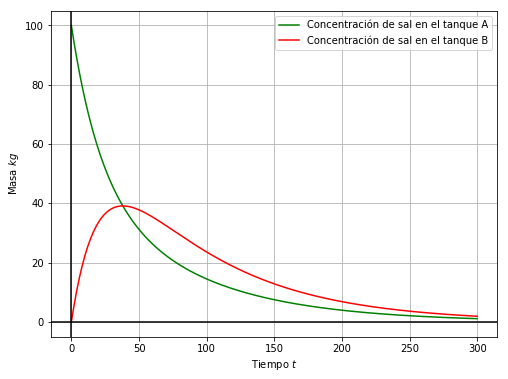

In [24]:
plt.figure(figsize=(8,6))
plt.plot(t, x1, label='Concentración de sal en el tanque A',color ='g')
plt.plot(t, x2, label='Concentración de sal en el tanque B', color ='r')
plt.xlabel('Tiempo $t$')

plt.ylabel('Masa $kg$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

A medida que el tiempo avanza, toda el agua con sal va saliendo  del tanque $B$ mientras entra agua pura al sistema, tal como dice el problema.

Las gráficas muestran como el tanque $A$ va transportando toda la concentración de sal hacia el tanque $B$, por esa razón, la gráfica de $A$ va disminuyendo con respecto al tiempo, mientras que la de $B$ aumenta al comienzo, sin embargo, el tanque $B$ también va sacando agua con sal hacia el exterior, y se va llenando con agua cada vez menos concentrada proveniente de $A$, debido a esto, la gráfica de $B$ también baja. Finalmente, ambas gráficas van bajando su concentración con respecto al tiempo.

> *Ahora graficamos el retrato de fase, es decir, la concentración de $B$ vs  la concentración de $A$*

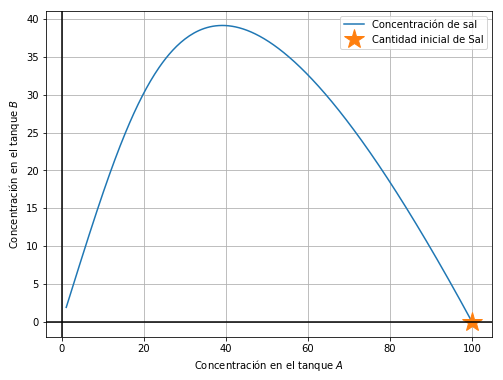

In [25]:
#Graficar el retrato de fase, es decir,  y  vs.  𝑥 .
plt.figure(figsize=(8,6))
plt.plot(x1, x2, label='Concentración de sal')
plt.plot(x1[0], x2[0], '*', ms=20, label = 'Cantidad inicial de Sal')

plt.xlabel('Concentración en el tanque $A$')
plt.ylabel('Concentración en el tanque $B$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Esta gráfica representa lo mismo que la anterior, sin embargo, el tiempo está ausente.

Mientras decrece la función en el eje de las $x$ (concentración de $A$), crece en el eje de las $y$ (concentración en $B$), se debe a que la sal de $A$ se va al tanque $B$, hasta que finalmente la función tiende a $0$ hacia la izquierda, este momento representa cuando ambos tanques se van quedando sin concentración de sal, ya que toda la concentración de sal sale por el tanque $B$, mientras este se llena de agua pura proveniente de $A$.


# Conclusiones

* Los tanques se quedan sin concentración de sal cuando $t$ tiende a infinito.

* La concentración de $B$ aumenta momentaneamente, hasta que la concentración adquirida fluye totalmente al exterior.

* la concentración de $A$ siempre está disminuyendo, debido a que entra agua pura y sale el agua con sal

* La solución numérica funciona de modo correcto para simular la variación de concentración de sal en los tanques con respecto al tiempo.

* No es necesario calcular la solución analítica, las gráficas nos pueden decir la concentración en el tiempo deseado








# Referencias

Jover, I. C. (2011). Ecuaciones Diferenciaes. Edo. de México: Pearson.

